# Experiment Notebook: Code Walkthrough

# Table of Contents
* [Experiment Summary](#Experiment-Summary)
* [Experiment Assumptions](#Experiment-Assumptions)
* [Experiment Setup](#Experiment-Setup)
* [Analysis 1: ...](#Analysis-1:-...)

# Experiment Summary 

The purpose of this notebook is to...

# Experiment Assumptions

See [assumptions document](../../ASSUMPTIONS.md) for further details.

# Experiment Setup

We begin with several experiment-notebook-level preparatory setup operations:

* Import relevant dependencies
* Import relevant experiment templates
* Create copies of experiments
* Configure and customize experiments 

Analysis-specific setup operations are handled in their respective notebook sections.

In [1]:
# Import the setup module:
# * sets up the Python path
# * runs shared notebook configuration methods, such as loading IPython modules
import setup

import copy
import logging
import numpy as np
import pandas as pd
import plotly.express as px

import experiments.notebooks.visualizations as visualizations
from experiments.run import run
from experiments.utils import display_code

time: 865 ms (started: 2022-06-16 11:17:38 -04:00)


In [2]:
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 1200
png_renderer.height = 500
# png_renderer.scale = 1

pio.renderers.default = "png"

time: 168 ms (started: 2022-06-16 11:17:39 -04:00)


In [3]:
# Enable/disable logging
logger = logging.getLogger()
logger.disabled = False

time: 22.4 ms (started: 2022-06-16 11:17:39 -04:00)


In [4]:
# Import experiment templates
import experiments.default_experiment as default_experiment

time: 24.3 ms (started: 2022-06-16 11:17:39 -04:00)


In [5]:
# Inspect experiment template
display_code(default_experiment)

"""
The default experiment with default model Initial State, System Parameters, and Simulation Configuration.
The defaults are defined in their respective modules:
* Initial State in `model/state_variables.py`
* System Parameters in `model/system_parameters.py`
* Simulation Configuration in `experiments/simulation_configuration.py`
"""

from radcad import Simulation, Experiment, Backend

from model import model
from experiments.simulation_configuration import TIMESTEPS, DELTA_TIME, MONTE_CARLO_RUNS
from model.initialization import setup_initial_state, setup_state_update_blocks


# Create Model Simulation
simulation = Simulation(
    model=model,
    timesteps=TIMESTEPS,
    runs=MONTE_CARLO_RUNS
)
# Create Experiment of single Simulation
experiment = Experiment([simulation])
# Configure Simulation & Experiment engine
simulation.engine = experiment.engine
experiment.engine.backend = Backend.SINGLE_PROCESS
experiment.engine.deepcopy = True
experiment.engine.drop_substeps = True

# Configure simulation hooks
before_subset = lambda context: [
    setup_initial_state(context),
    setup_state_update_blocks(context)
]
simulation.before_subset = before_subset
experiment.before_subset = before_subset

time: 113 ms (started: 2022-06-16 11:17:39 -04:00)


In [6]:
# Create a simulation for each analysis
simulation_1 = copy.deepcopy(default_experiment.experiment.simulations[0])

time: 25.2 ms (started: 2022-06-16 11:17:40 -04:00)


In [7]:
# Experiment configuration
simulation_1.runs = 5

simulation_1.model.initial_state.update({})

simulation_1.model.params.update({
    "rebalancing_period": [30, 60, 90]
})

time: 24.5 ms (started: 2022-06-16 11:17:40 -04:00)


# Analysis 1: Model Output

A visualization of model outputs based on existing implementation of 
- PCV Management and Rebalancing
- Liquidity Pool CFMM Dynamics

In [8]:
# Analysis-specific setup

time: 25.5 ms (started: 2022-06-16 11:17:40 -04:00)


In [9]:
# Experiment execution
df, exceptions = run(simulation_1)

2022-06-16 11:17:40,210 - root - INFO - Running experiment
2022-06-16 11:17:40,213 - root - INFO - Setting up initial state
2022-06-16 11:17:40,214 - root - INFO - Starting simulation 0 / run 0 / subset 0
2022-06-16 11:17:40,912 - root - INFO - Setting up initial state
2022-06-16 11:17:40,913 - root - INFO - Starting simulation 0 / run 0 / subset 1
2022-06-16 11:17:41,598 - root - INFO - Setting up initial state
2022-06-16 11:17:41,599 - root - INFO - Starting simulation 0 / run 0 / subset 2
2022-06-16 11:17:42,265 - root - INFO - Setting up initial state
2022-06-16 11:17:42,266 - root - INFO - Starting simulation 0 / run 1 / subset 0
2022-06-16 11:17:42,938 - root - INFO - Setting up initial state
2022-06-16 11:17:42,939 - root - INFO - Starting simulation 0 / run 1 / subset 1
2022-06-16 11:17:43,609 - root - INFO - Setting up initial state
2022-06-16 11:17:43,610 - root - INFO - Starting simulation 0 / run 1 / subset 2
2022-06-16 11:17:44,273 - root - INFO - Setting up initial state


In [10]:
# Post-processing and visualizations

time: 22.8 ms (started: 2022-06-16 11:17:57 -04:00)


In [11]:
df

,timestamp,total_fei_supply,total_protocol_owned_fei,total_user_circulating_fei,idle_user_circulating_fei,fei_minted_redeemed,cumulative_psm_redemptions,fei_price,volatile_asset_price,stable_asset_price,...,volatile_deposit_yield_bearing_yield_accrued,volatile_deposit_yield_bearing_yield_value,volatile_deposit_yield_bearing_yield_rate,volatile_deposit_liquidity_pool_asset,volatile_deposit_liquidity_pool_deposit_type,volatile_deposit_liquidity_pool_balance,volatile_deposit_liquidity_pool_asset_value,volatile_deposit_liquidity_pool_yield_accrued,volatile_deposit_liquidity_pool_yield_value,volatile_deposit_liquidity_pool_yield_rate
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-06-16 11:17:39.703072,2022-06-16 11:17:39.703072,4.500000e+08,1.949191e+08,225000000,0.0,-80915.167672,0.0,1.0,1987.074524,0.989903,...,14.041096,2.790070e+04,0.1,volatile,liquidity_pool,12540.710721,2.491933e+07,0.0,0.0,NaN
2022-06-17 11:17:39.703072,2022-06-17 11:17:39.703072,4.499191e+08,1.949675e+08,225000000,0.0,48406.511729,0.0,1.0,1994.782628,0.996714,...,28.082192,5.601787e+04,0.1,volatile,liquidity_pool,12516.469964,2.496764e+07,0.0,0.0,NaN
2022-06-18 11:17:39.703072,2022-06-18 11:17:39.703072,4.499675e+08,1.949175e+08,225000000,0.0,-49973.740747,0.0,1.0,1986.793717,1.001356,...,42.123288,8.369028e+04,0.1,volatile,liquidity_pool,12541.647885,2.491767e+07,0.0,0.0,NaN
2022-06-19 11:17:39.703072,2022-06-19 11:17:39.703072,4.499175e+08,1.950538e+08,225000000,0.0,136273.662341,0.0,1.0,2008.572592,0.999706,...,56.164384,1.128102e+05,0.1,volatile,liquidity_pool,12473.635464,2.505420e+07,0.0,0.0,NaN
2022-06-20 11:17:39.703072,2022-06-20 11:17:39.703072,4.500538e+08,1.947180e+08,225000000,0.0,-335837.919999,0.0,1.0,1955.052903,1.000125,...,70.205479,1.372554e+05,0.1,volatile,liquidity_pool,12643.620701,2.471895e+07,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-11 11:17:39.703072,2023-06-11 11:17:39.703072,4.494612e+08,1.945305e+08,225000000,0.0,69322.511459,0.0,1.0,1917.315426,0.998823,...,1235.616438,2.369066e+06,0.1,volatile,liquidity_pool,12794.304552,2.453072e+07,0.0,0.0,NaN
2023-06-12 11:17:39.703072,2023-06-12 11:17:39.703072,4.495305e+08,1.945594e+08,225000000,0.0,28883.053104,0.0,1.0,1921.816769,0.998912,...,1249.657534,2.401613e+06,0.1,volatile,liquidity_pool,12779.302961,2.455948e+07,0.0,0.0,NaN
2023-06-13 11:17:39.703072,2023-06-13 11:17:39.703072,4.495594e+08,1.944737e+08,225000000,0.0,-85644.740583,0.0,1.0,1908.429688,0.990479,...,1263.698630,2.411680e+06,0.1,volatile,liquidity_pool,12824.157699,2.447400e+07,0.0,0.0,NaN


time: 67.4 ms (started: 2022-06-16 11:17:57 -04:00)


## Asset Prices

Asset prices are implemented as two types of stochatic processes:
- Volatile Assets: Brownian Motion $$dX_t = \mu_t dt + \sigma_t dW_t, \ W_t \sim BM(0,1)$$
- Stable Assets: Gaussian Noise $$X_t = \mu + \sigma Z_t, Z_t \sim N(0,1)$$

Volatile Asset price process for monte carlo runs for parameter values: $$\mu=-50, \sigma=20$$

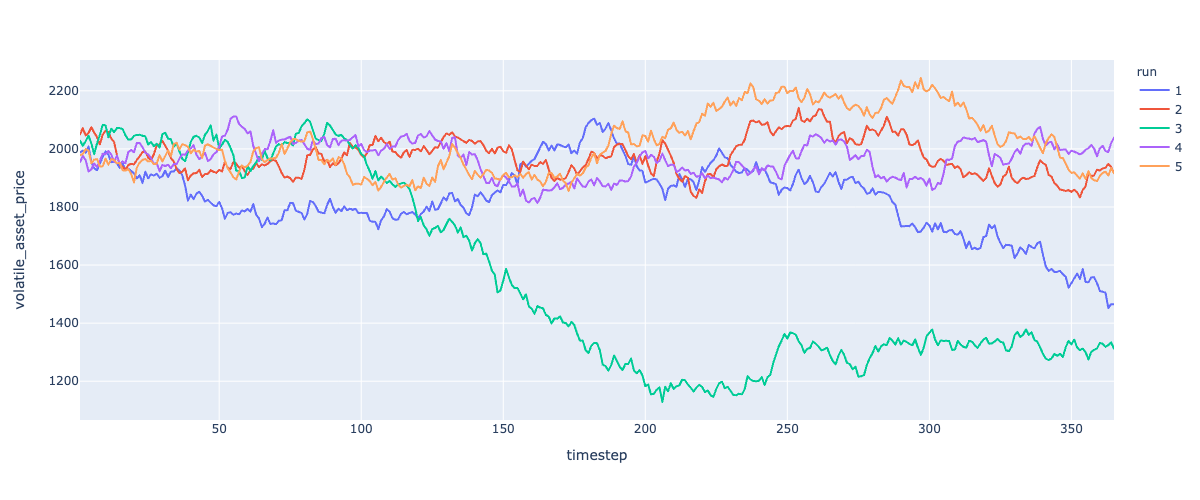

time: 3.45 s (started: 2022-06-16 11:17:57 -04:00)


In [12]:
df.query("subset == 0").plot(x='timestep', y='volatile_asset_price', color='run')

Stable Asset price process for monte carlo runs for parameter values: $$\mu=1, \sigma=0.005$$

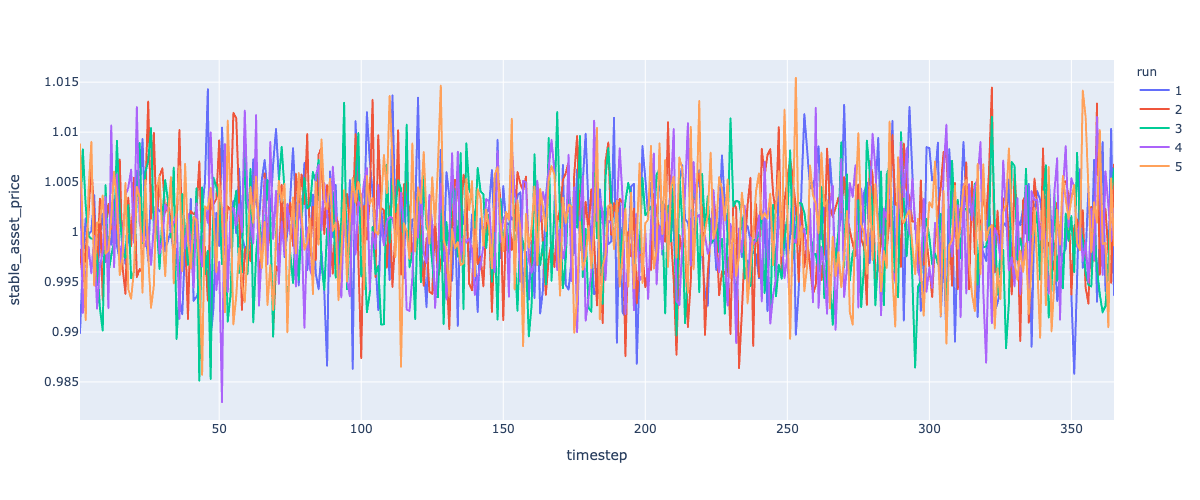

time: 779 ms (started: 2022-06-16 11:18:00 -04:00)


In [13]:
df.query("subset == 0").plot(x='timestep', y='stable_asset_price', color='run')

A realization of a single stable asset process run, compared to FEI's current implementation as equal to $1 by construction

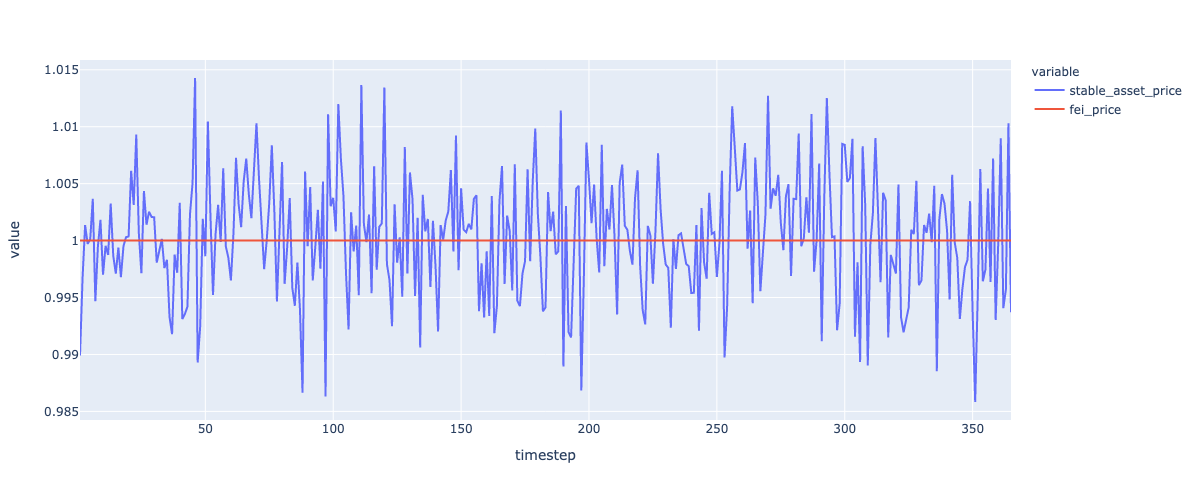

time: 193 ms (started: 2022-06-16 11:18:01 -04:00)


In [14]:
df.query("run == 1 and subset == 0").plot(x='timestep', y=['stable_asset_price', 'fei_price'])

## Protocol Controlled Value

The main <b>monetary policy lever</b> implemented and defining the dynamics of this block is <b>PCV rebalancing</b>. The current implementation is a naive <i>stable-backing-ratio based</i> rebalancing strategy. Where if the stable backing ratio is below an arbitrary value (50%) in this case, the necessary amount of volatile assets is sold and the corresponding amount of stable assets is bought. The test for stable backing ratio comparison occurs arbitrarily for three parameter values of rebalancing frequency:
- 30 days
- 60 days
- 90 days

The strategy pays no attention to dollar cost averaging the entry/exit of respective positions nor does it take any other parameters into account, as such, the dynamics are largely impulsive.

The stable backing ratio resulting from the rebalancing policy for various rebalancing frequency dates. The stable backing ratio for the current run never falls below 50% after 200 timesteps.

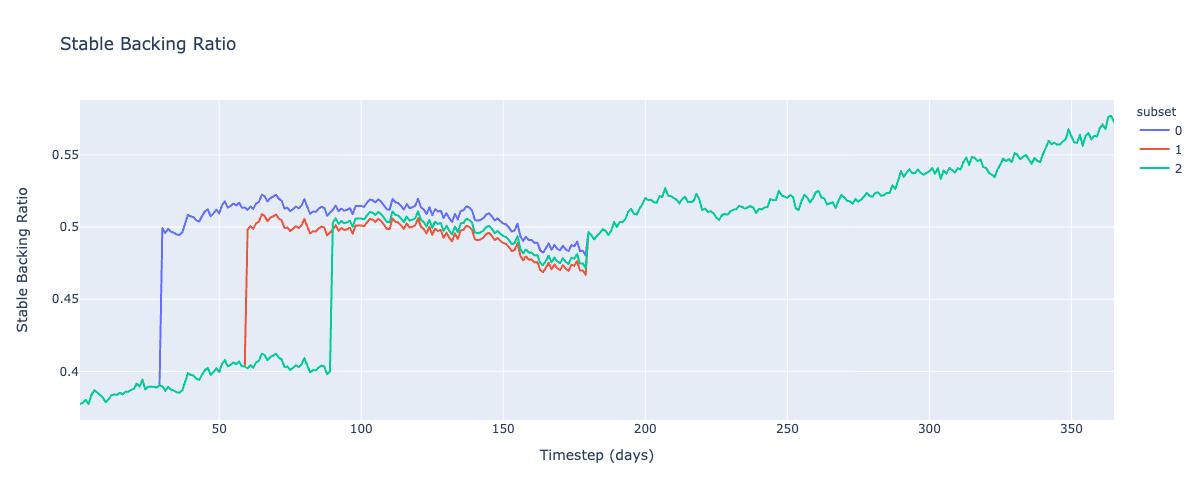

time: 611 ms (started: 2022-06-16 11:18:01 -04:00)


In [15]:
fig = df.query('run == 1').plot(
    x='timestep',
    y=['stable_backing_ratio'],
    title='Stable Backing Ratio',
    color='subset'
)

fig.update_xaxes(title='Timestep (days)')
fig.update_yaxes(title='Stable Backing Ratio')

An overall look at PCV rebalancing. At period 30,roughly 140M of Volatile asset is sold, and 140M worth of Stable asset is bought. This does not affect the total PCV value but changes the stable backing ratio to the one desired.

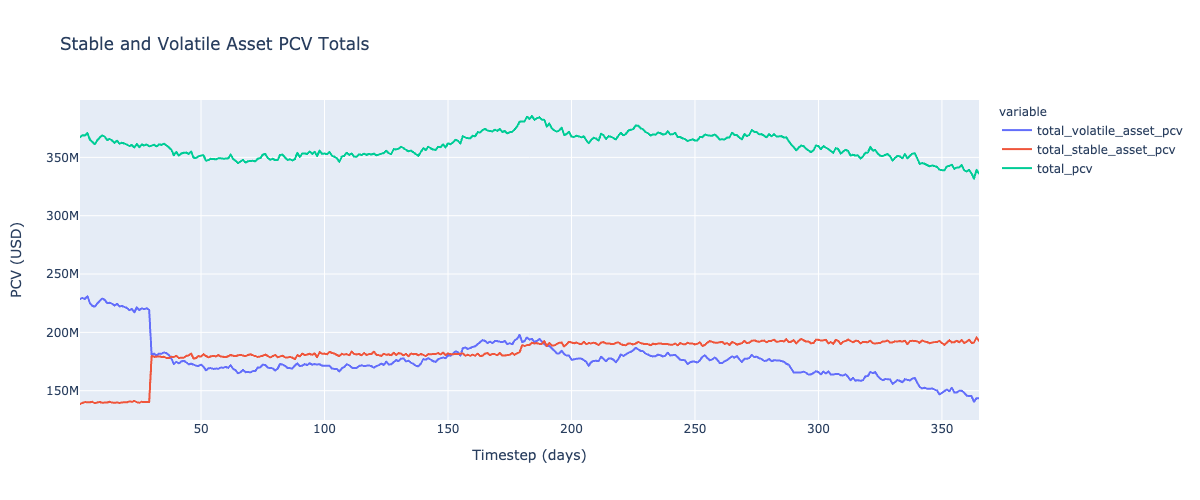

time: 622 ms (started: 2022-06-16 11:18:02 -04:00)


In [16]:
fig = df.query("run == 1 and subset == 0").plot(
    x='timestep',
    y=['total_volatile_asset_pcv', 'total_stable_asset_pcv', 'total_pcv'],
    title='Stable and Volatile Asset PCV Totals',
)

fig.update_xaxes(title='Timestep (days)')
fig.update_yaxes(title='PCV (USD)')

The <b>dollar value</b> of the Stable Asset constituent of PCV across rebalancing frequencies.

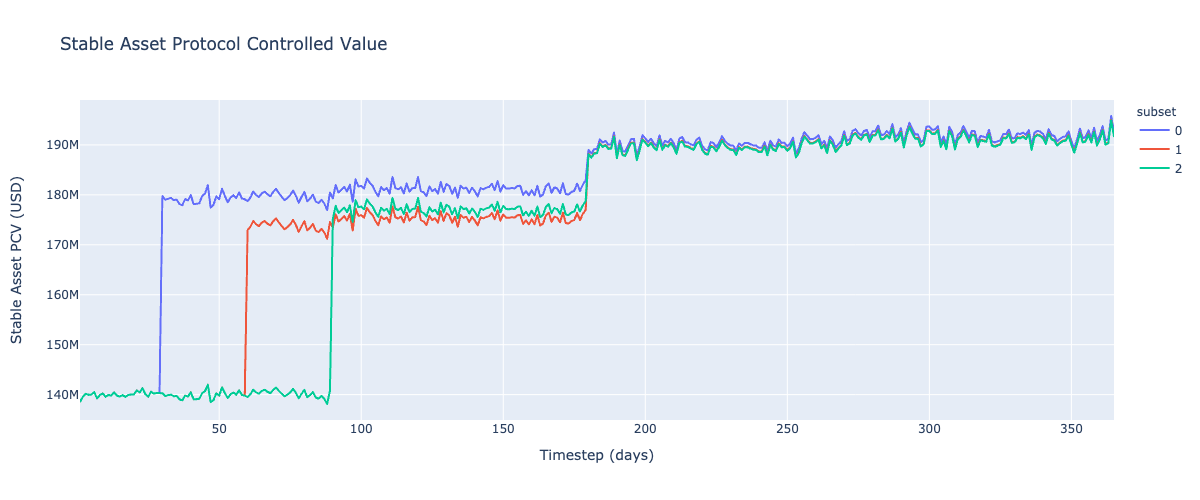

time: 597 ms (started: 2022-06-16 11:18:02 -04:00)


In [17]:
fig = df.query('run == 1').plot(
    x='timestep',
    y='total_stable_asset_pcv',
    title='Stable Asset Protocol Controlled Value',
    color='subset'
)

fig.update_xaxes(title='Timestep (days)')
fig.update_yaxes(title='Stable Asset PCV (USD)')

The <b>dollar value</b> of the Volatile Asset constituent of PCV across rebalancing frequencies.

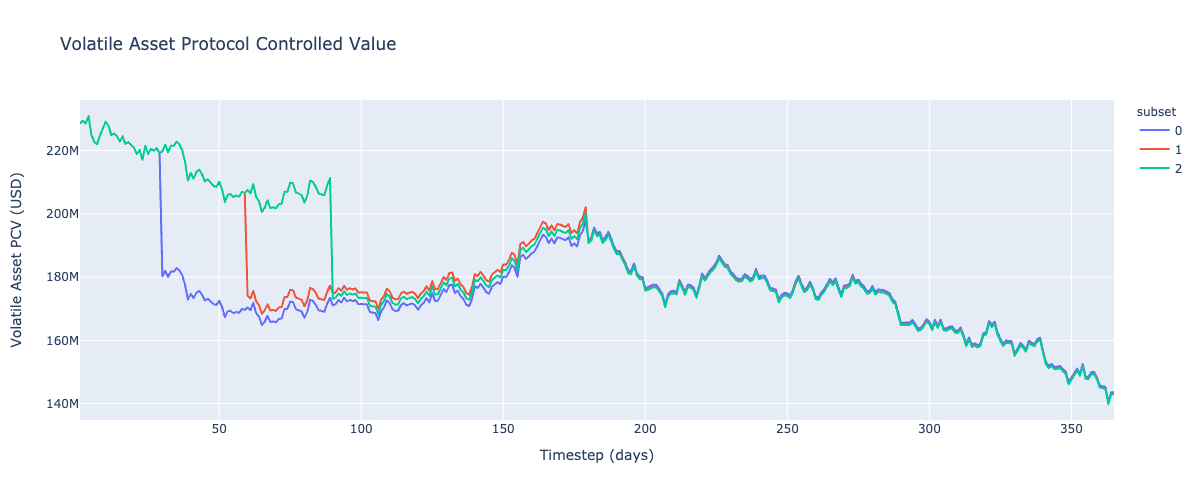

time: 607 ms (started: 2022-06-16 11:18:03 -04:00)


In [18]:
fig = df.query('run == 1').plot(
    x='timestep',
    y='total_volatile_asset_pcv',
    title='Volatile Asset Protocol Controlled Value',
    color='subset'
)

fig.update_xaxes(title='Timestep (days)')
fig.update_yaxes(title='Volatile Asset PCV (USD)')

The <b>dollar value</b> of PCV across rebalancing frequencies.

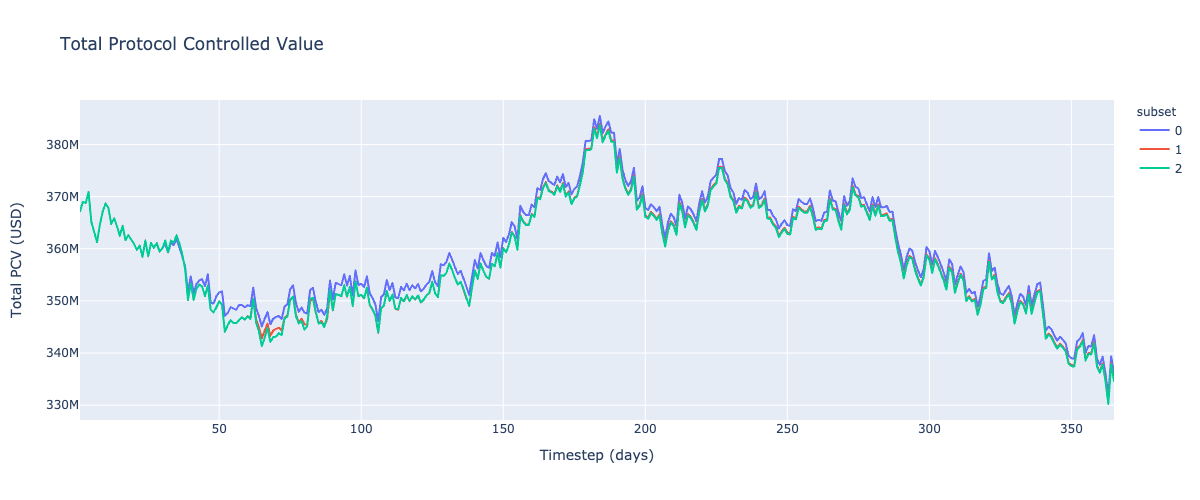

time: 590 ms (started: 2022-06-16 11:18:04 -04:00)


In [19]:
fig = df.query('run == 1').plot(
    x='timestep',
    y='total_pcv',
    title='Total Protocol Controlled Value',
    color='subset',
)

fig.update_xaxes(title='Timestep (days)')
fig.update_yaxes(title='Total PCV (USD)')

The collateral ratio series over time. This is, by construction, strongly correlated with PCV Value, and in practice driven by the realization of the ETH price process for the current run.

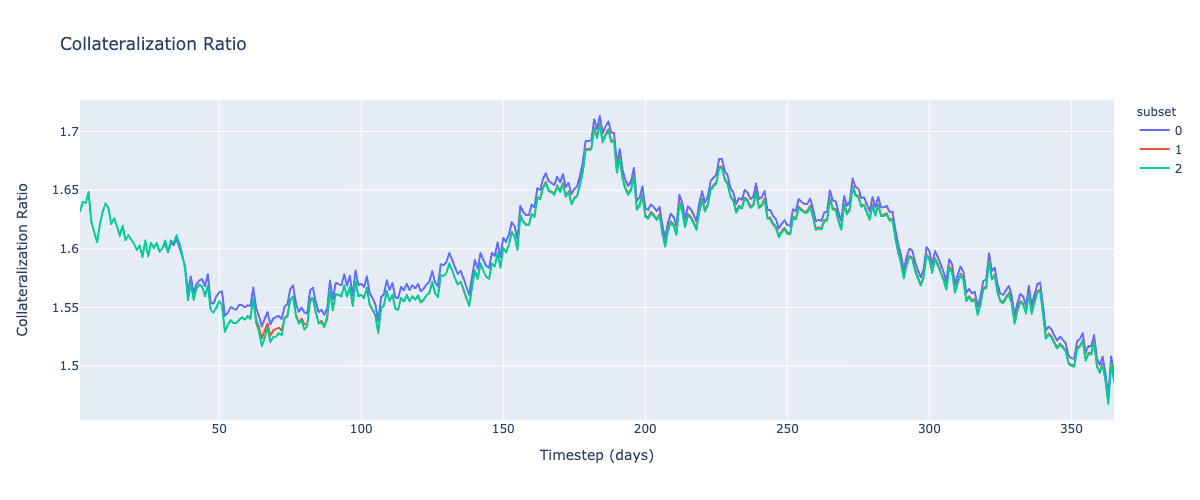

time: 603 ms (started: 2022-06-16 11:18:04 -04:00)


In [20]:
fig = df.query('run == 1').plot(
    x='timestep',
    y=['collateralization_ratio'],
    title='Collateralization Ratio',
    color='subset'
)

fig.update_xaxes(title='Timestep (days)')
fig.update_yaxes(title='Collateralization Ratio')

## Liquidity Pool Source / Sink

Here we look at the dynamics of <b>FEI sourced and sinked</b> as a result of CFMM movements. These dynamics do <b>not</b> tie into broader PCV management save for the basic accounting of FEI and Volatile asset amount held.

In [21]:
def get_pcv_balance_from_deposits(df, asset, deposit_type, subset=0):
    
    col_str = asset+'_deposit_'+deposit_type
    
    df_ = df.query("subset == @subset")[[col_str, 'run', 'timestep']]
    df_[col_str+'_balance'] = df_[col_str].map(lambda x: x.balance)
    return df_[[col_str+'_balance', 'run', 'timestep']]

time: 30.6 ms (started: 2022-06-16 11:18:05 -04:00)


Liquidity pool TVL for 5 monte carlo runs for the same underlying volatile asset price parameters.

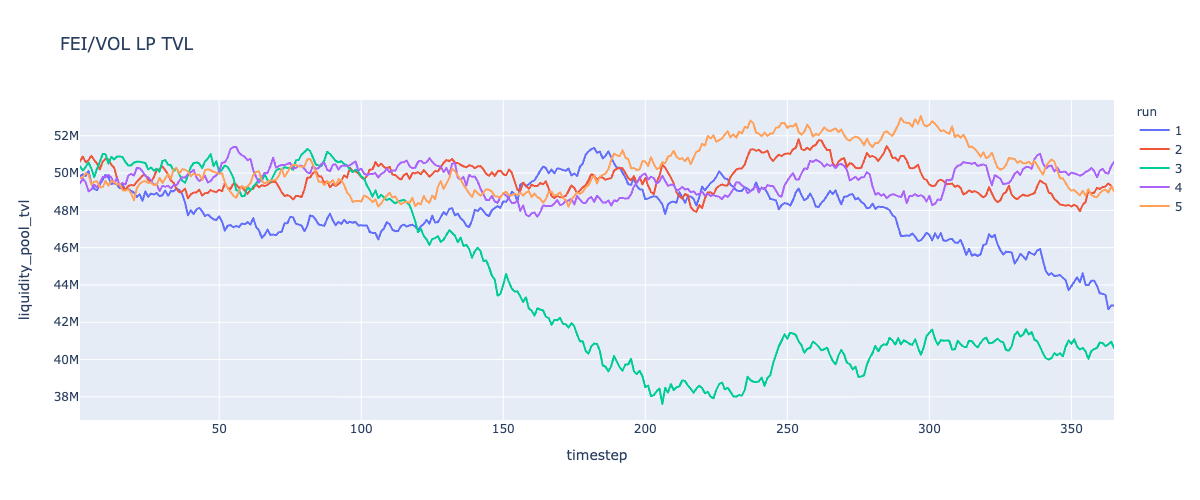

time: 650 ms (started: 2022-06-16 11:18:05 -04:00)


In [22]:
df.query("subset == 0").plot(x='timestep', y ='liquidity_pool_tvl', color='run', title='FEI/VOL LP TVL',)

FEI balance, in <b>FEI units (FEI)</b>, in the liquidity pool, for 5 monte carlo runs for the same underlying volatile asset price parameters.

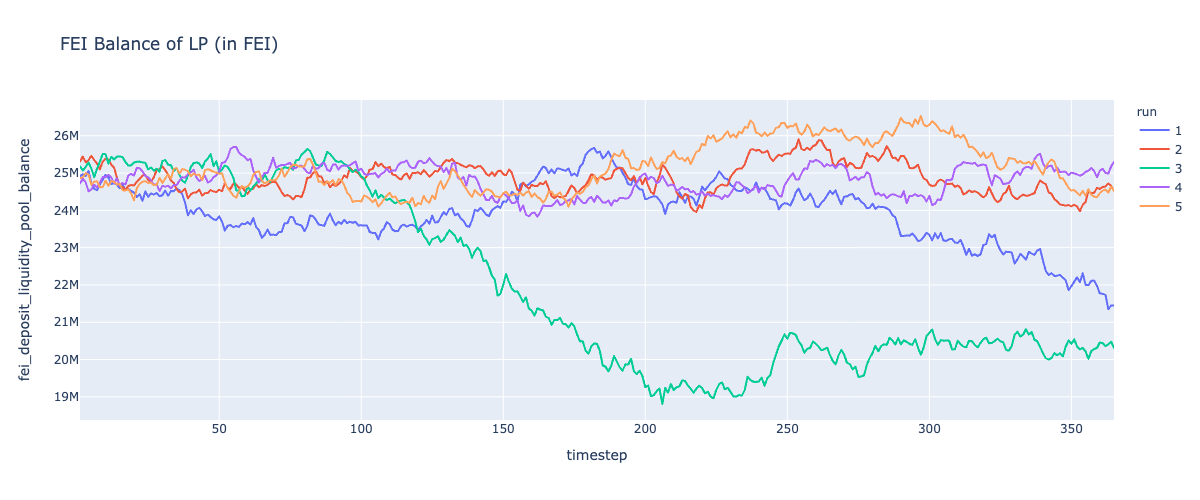

time: 680 ms (started: 2022-06-16 11:18:05 -04:00)


In [23]:
get_pcv_balance_from_deposits(df, 'fei', 'liquidity_pool', subset=0).plot(
    title='FEI Balance of LP (in FEI)',
    x='timestep',
    y='fei_deposit_liquidity_pool_balance',
    color='run'
)

Volatile asset balance, in <b>Volatile Asset Units</b> in the liquidity pool, for 5 monte carlo runs for the same underlying volatile asset price parameters.

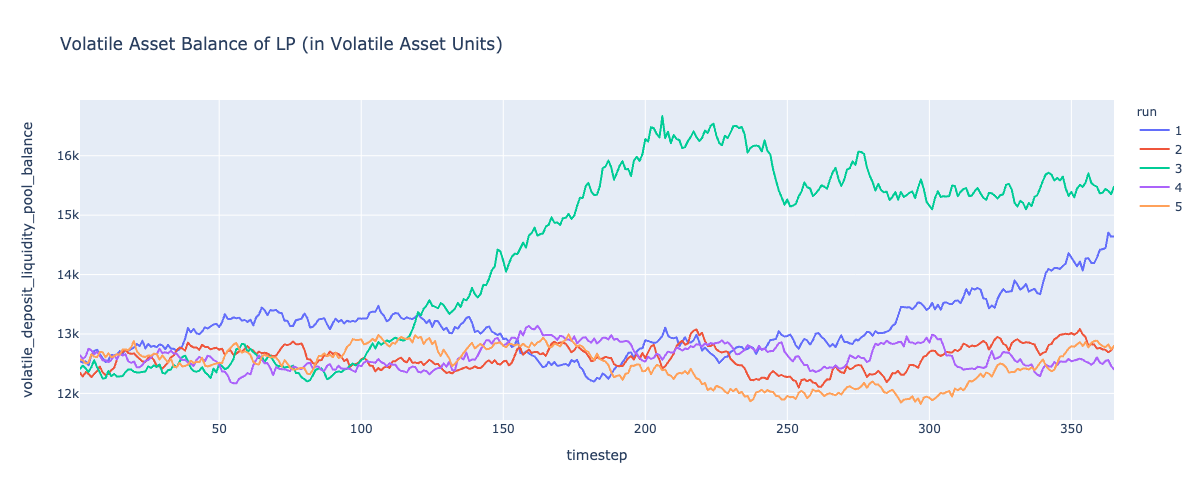

time: 645 ms (started: 2022-06-16 11:18:06 -04:00)


In [24]:
get_pcv_balance_from_deposits(df, 'volatile', 'liquidity_pool', subset=0).plot(
    title='Volatile Asset Balance of LP (in Volatile Asset Units)',
    x='timestep',
    y='volatile_deposit_liquidity_pool_balance',
    color='run'
)

Here, we broadly illustrate the dynamics captured in the corresponding CFMM spreadhseet - As ETH price decreases, FEI amount in pool decreases and ETH amount in pool increases. Need more ETH per unit of FEI. As a result, TVL decreases.

The time series of FEI LP balance differential in subsequent time periods for a single run.

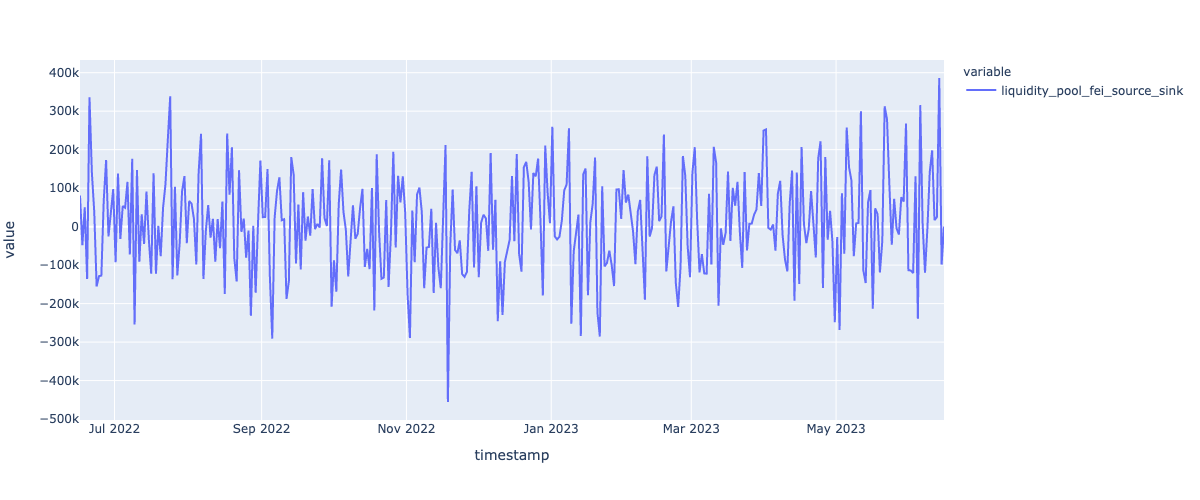

time: 186 ms (started: 2022-06-16 11:18:07 -04:00)


In [25]:
df.query("run == 1 and subset == 0")['liquidity_pool_fei_source_sink'].plot()

As per the spreadsheet, we proceed to calculate <b>FEI Released to Market</b> with respect to t=0, which is the current FEI LP balance minus the balance at time zero, in number of FEI tokens.

In [26]:
fei_amt = get_pcv_balance_from_deposits(df, 'fei', 'liquidity_pool', subset=0)
fei_amt_init = fei_amt.iloc[0]['fei_deposit_liquidity_pool_balance']

fei_amt['fei_released_into_market'] = -(fei_amt['fei_deposit_liquidity_pool_balance'] - fei_amt_init)

time: 41.3 ms (started: 2022-06-16 11:18:07 -04:00)


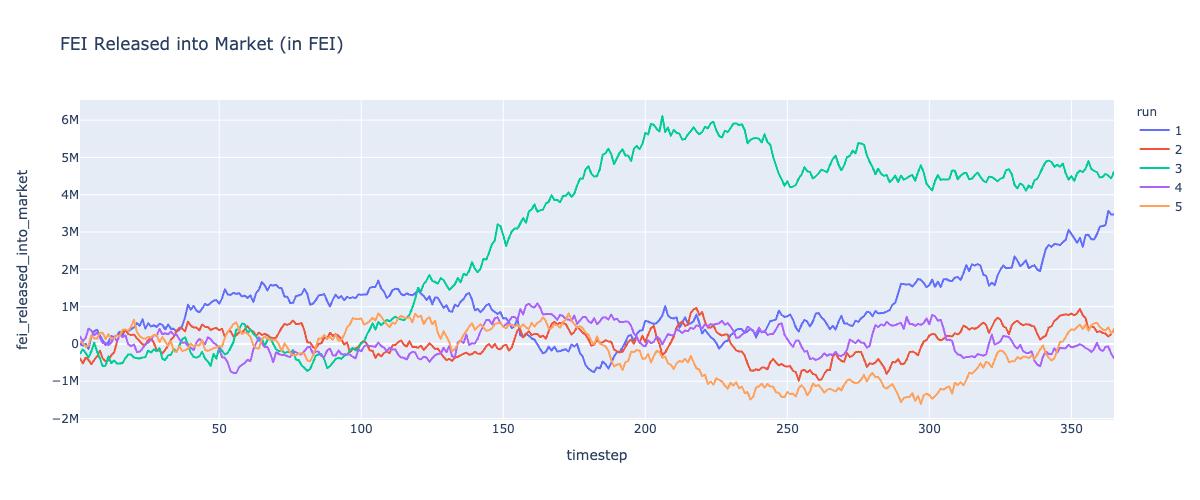

time: 667 ms (started: 2022-06-16 11:18:07 -04:00)


In [27]:
fei_amt.plot(
    title='FEI Released into Market (in FEI)',
    x='timestep',
    y='fei_released_into_market',
    color='run'
)